# Final Challenge Code:Nation Data Science
***

> ## Purpose:
The purpose of this product is to provide an automated service that recommends leads to a user given their current customer list (Portfolio).

***
## Description of steps:
- Data Preparation:
> - Import Libraries and files
> - T1 - preparation 1: Collection in the market of missing information in the portfolio;
> - T2 - preparation 2: Exclusion of features with high percentage of NA's values and filling of the remaining NA's;
> - T3 - preparation 3: Conversion of values to numeric type;
> - T4 - preparation 4: Label customers and not customers;
> - T5 - preparation 5: Balance dataset and Split train and test data;
- Organization of Datasets preparation for the models;
- Prediction models:
> - Models;
> - Benchmarking;
> - Apply the best model;
- Recommendation:
> - Total of possible customers;
> - Ranking;
> - Recommendation with original values;
> - Save recommendation in csv files;
- Portfolio x prediction
> - Graphs;
> - Verify similar features values;
- Extras:
> - Companies with tax, legal, financial or operational issues.

***
> ***
***
# Data Preparation:

***
## Libraries and Files:

> ### Packages:

In [1]:
# Data handling:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# models: 
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
# Merics:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.spatial import distance
# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
%matplotlib inline

> ### Data:

In [2]:
market = pd.read_csv("estaticos_market.csv")

In [3]:
portfolio = pd.read_csv("estaticos_portfolio2.csv")

In [4]:
dictionary = pd.read_csv("dicionario.csv")

In [5]:
# Adjust for viewing:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', len(market.columns))
pd.set_option('display.max_rows', len(market))

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

***
## T1 - Dataset complete Portfolio:
The portfolio dataset has only the column 'id', we will complete with the other data that are present in the dataset market.

In [6]:
# DataFrame handling  Step 1:
market_T1= market.copy()

# Creation of id_num column to help manipulation:
market_T1['id_num'] = market_T1['Unnamed: 0']

# Delete column 'Unnamed: 0':
market_T1 = market_T1.drop(['Unnamed: 0'], axis = 1)

# Complete portfolio generation:
portfolio_T1 = pd.DataFrame(portfolio['id'])
portfolio_T1 = pd.merge(portfolio_T1, market_T1, on='id', how='left')

> ### Heads:

In [7]:
market_T1.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,

In [8]:
portfolio_T1.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,09e95c1a84049001d086470a8f320a19b076f955a89122ff8360ac2e4d6eca5d,True,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCI

> ### Shapes(Rows x Columns):

In [9]:
print('Market:', market_T1.shape)
print('Portfolio:', portfolio_T1.shape)

Market: (462298, 182)
Portfolio: (566, 182)


***
## T2 - NA's Handling

> ### NA's per columns:

In [10]:
# NA's percentage check
qt_na_per_col_portfolio_T1 = pd.DataFrame(portfolio_T1.isna().sum().sort_values(ascending=False).reset_index())
qt_na_per_col_portfolio_T1.columns = ['Column', 'qt_NA']
qt_na_per_col_portfolio_T1['qt_not_NA'] = (len(portfolio_T1) - qt_na_per_col_portfolio_T1['qt_NA'])
qt_na_per_col_portfolio_T1['Percentage_of_NA'] = ((qt_na_per_col_portfolio_T1['qt_NA'] * 100) / len(portfolio_T1)).round(2)
qt_na_per_col_portfolio_T1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181
Column,grau_instrucao_macro_desconhecido,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,idade_media_coligadas_baixadas,coligada_mais_nova_baixada,qt_socios_st_suspensa,coligada_mais_antiga_baixada,vl_total_veiculos_antt,vl_total_veiculos_antt_grupo,vl_total_tancagem,vl_total_tancagem_grupo,qt_socios_pep,qt_socios_pj_nulos,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_socios_pj_ativos,qt_socios_pj_baixados,vl_potenc_cons_oleo_gas,grau_instrucao_macro_analfabeto,total_filiais_coligados,max_filiais_coligados,media_filiais_coligados,min_filiais_coligados,qt_socios_feminino,idade_ate_18,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,min_funcionarios_coligados_gp,max_funcionarios_coligados_gp,qt_funcionarios_coligados,media_funcionarios_coligados_gp,qt_funcionarios_coligados_gp,qt_art,sum_faturamento_estimado_coligadas,min_faturamento_est_coligados_gp,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,faturamento_est_coligados,qt_coligados_nula,idade_media_coligadas_ativas,qt_coligados_exterior,qt_coligados_sudeste,qt_coligados_centro,qt_coligados_nordeste,qt_coligados_sul,qt_coligados_norte,qt_coligados_epp,qt_coligados_ltda,qt_coligados_me,qt_coligados_sa,qt_coligadas,coligada_mais_antiga_ativa,qt_coligados_suspensa,coligada_mais_nova_ativa,idade_minima_coligadas,idade_maxima_coligadas,idade_media_coligadas,qt_regioes_coligados,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_ufs_coligados,qt_coligados_mei,qt_ramos_coligados,qt_coligados_industria,qt_coligados_atividade_inativo,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_baixo,qt_coligados_ccivil,qt_coligados_serviço,qt_coligados_comercio,qt_coligados_agropecuaria,qt_socios_masculino,qt_socios_st_regular,idade_minima_socios,idade_media_socios,idade_maxima_socios,qt_socios,qt_socios_pj,qt_socios_pf,de_indicador_telefone,vl_frota,idade_de_19_a_23,vl_total_veiculos_leves,vl_total_veiculos_pesados,empsetorcensitariofaixarendapopulacao,nm_micro_regiao,nm_meso_regiao,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,idade_de_54_a_58,idade_de_24_a_28,grau_instrucao_macro_escolaridade_superior,idade_de_49_a_53,idade_de_44_a_48,idade_de_29_a_33,grau_instrucao_macro_escolaridade_media,tx_crescimento_24meses,tx_crescimento_12meses,idade_de_34_a_38,idade_de_39_a_43,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_matriz,fl_optante_simples,fl_epp,de_natureza_juridica,dt_situacao,fl_st_especial,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_ltda,sg_uf,fl_mei,fl_sa,fl_me,idade_emp_cat,idade_empresa_anos,setor,de_ramo,natureza_juridica_macro,fl_email,id_num,fl_optante_simei,min_meses_servicos_all,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,media_meses_servicos,sg_uf_matriz,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_f

> ### Exclusion High Percent NA Columns:

In [11]:
# DataFrame preparation Step 2:
market_T2 = market_T1.copy()

In [12]:
# NA Limit
percent_NA = 55

In [13]:
# Selection of all columns that have high NA's:
column_NA_exclusion = qt_na_per_col_portfolio_T1['Column'].loc[qt_na_per_col_portfolio_T1['Percentage_of_NA'] >= percent_NA]
# Exclusion of columns:
market_T2 = market_T2.drop(column_NA_exclusion, axis = 1)

In [14]:
market_T2.shape

(462298, 139)

> ### Data Types:

In [15]:
# Types:
types_market_T2 = pd.DataFrame(market_T2.dtypes).reset_index()
types_market_T2.columns = ['Columns', 'types']
types_market_T2.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138
Columns,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
types,object,bool,object,object,object,object,object,float64,object,bool,bool,bool,bool,bool,object,bool,bool,bool,object,object,object,object,object,object,float64,float64,object,float64,float64,float64,object,object,object,object,float64,object,object,object,float64,float64,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float

In [16]:
# type lists:
type_float = list (market_T2.select_dtypes (include = ['float']). columns)
type_int = list (market_T2.select_dtypes (include = ['int']). columns)
type_bool = list (market_T2.select_dtypes (include = ['bool']). columns)
type_object = list (market_T2.select_dtypes (include = ['object']). columns)

In [17]:
# Removal of identifying columns from type lists:
type_object.remove('id')
type_int.remove('id_num')

# Remove dt_situacao
type_object.remove('dt_situacao')

> ### Fill NA'S:
- Numeric variables by 0;
- Categorical variables by value 'INDETERMINADA';

In [18]:
# Fill Na's
market_T2[type_int] = market_T2[type_int].fillna(0)
market_T2[type_float] = market_T2[type_float].fillna(0)
market_T2[type_object] = market_T2[type_object].fillna('INDETERMINADA')

In [19]:
# Dataframe after preparation:
market_T2.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,0.0,0.0,True,8.0,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,BOA,False,0.0,0.00,LESTE POTIGUAR,NATAL,True,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,6.0,8.0,6.0,6.0,0.0,0.0,0.0,0.0,220.477778,536.366667,57.3,57.3,536.366667,220.477778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0,1.0,5.0,0.0,21809443.0,3.634907e+06,13188096.0,210000.0,22019443.0,3.669907e+06,13188096.0,210000.0,0.0,0.0,0.0,0.0,0.0,6.0,21809443.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,119.0,26.0,100.0,0.0,1.0,4.0,6.0,5.0,3.0,4.0,2.0,0.0,1.0,1.0,25.0,0.0,26.0,19.166667,0.0,0.0,119.0,145.0,13.309195,93.266667,-0.933333,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,Fa

In [20]:
# Comparative:
print('Starter Market:', market_T1.shape)
print('Market after handling:', market_T2.shape)
print('Unimportant columns deleted:', market_T1.shape[1] - market_T2.shape[1])

Starter Market: (462298, 182)
Market after handling: (462298, 139)
Unimportant columns deleted: 43


***
## T3 - Variable coding:

In [21]:
# DataFrame preparation step 5:
market_T3 = market_T2.copy()
market_T3_a = market_T3[['id', 'id_num']]
# Exclusion of identification variables:
market_T3_b = market_T3.drop(['id', 'id_num'], axis = 1)

In [22]:
# Conversions:
market_T3_b[type_float] = market_T3_b[type_float].astype('int')
market_T3_b[type_bool] = market_T3_b[type_bool].astype('category')
market_T3_b[type_bool] = market_T3_b[type_bool].apply(lambda x: x.cat.codes)
market_T3_b[type_object] = market_T3_b[type_object].astype('category')
market_T3_b[type_object] = market_T3_b[type_object].apply(lambda x: x.cat.codes)

In [23]:
# Market Reconstruction:
market_T3 = pd.DataFrame()
market_T3 = pd.concat([market_T3_a, market_T3_b], axis=1)
market_T3 = market_T3.drop(['dt_situacao'], axis=1)

> ***

In [24]:
# Market after T3:
market_T3.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,1,60,4,2,11,2,14,1,0,0,0,0,0,0,1,1,1,32,10,0,0,0,0,0,1,8,0,0,0,20,5,0,23,0,0,0,0,0,7,49,1,2,2,0,44,47,41,2,2,6,8,6,6,0,0,0,0,220,536,57,57,536,220,0,0,0,0,0,0,0,6,0,0,0,2,1,5,0,0,1,5,0,21809443,3634907,13188096,210000,22019443,3669907,13188096,210000,0,0,0,0,0,6,21809443,2,2,3132172,3132172,119,26,100,0,1,4,6,5,3,4,2,0,1,1,25,0,26,19,0,0,119,145,13,93,0,43,93,19,26,26,27,0,-3,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,1,17,3,5,21,5,1,0,0,0,0,1,0,0,1,1,1,3,3,0,0,0,0,0,2,0,0,0,2,17,2,1,9,1,1,0,0,468,4,70,1,1,1,0,27,27,27,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,210000,210000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,2,1,17,1,5,32,5,7,3,0,0,0,1,0,0,0,1,1,87,21,0,0,0,0,0,1,0,0,0,1,2,0,0,26,3,1,0,0,713,2,44,1,1,1,0,32,32,32,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,50000,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Portfolio after T3
portfolio_T3 = pd.DataFrame(portfolio['id'])
portfolio_T3['Tr_exc'] = portfolio_T3['id'].isin(market_T3['id'])
portfolio_T3 = portfolio_T3[portfolio_T3['Tr_exc'] == True]
portfolio_T3 = portfolio_T3.drop(['Tr_exc'], axis = 1)
portfolio_T3 = pd.merge(portfolio_T3, market_T3, on='id', how='left')
# Full Portfolio View:
portfolio_T3.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,09e95c1a84049001d086470a8f320a19b076f955a89122ff8360ac2e4d6eca5d,1646,1,1,0,0,0,5,11,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,4,0,0,0,0,4,0,0,5,0,23,0,0,0,46132,2791,18,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,327487200,327487200,451,1361,81,18,0,23,411,508,282,103,22,10,2,2,523,836,1361,25,0,0,451,1812,84,357,-6,99,357,25,1361,1361,1383,0,-1,0,0
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728bb62194ca0842cce3e,2696,1,33,4,5,0,5,43,5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,20,16,0,8,16,20,0,20,5,0,23,0,0,0,1309391,1007,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,176802910,176802910,1359,991,42,57,11,59,104,157,129,163,113,132,123,54,414,523,991,23,0,0,1361,2352,80,5014,-9,149,526,23,991,991,1306,0,-24,0,0
2,16843c9ffb920170477118933798510d8d5f00f5c56c1221773356355bded321,3681,1,64,3,2,22,5,16,2,0,0,0,0,0,0,0,1,0,36,11,0,0,1,1,1,0,1,1,1,0,17,5,0,23,0,0,0,60101,688,10,11,1,2,2,0,70,70,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,27818640,27818640,172,119,52,47,1,10,27,30,20,15,11,3,2,19,9,91,119,4,21,7,172,291,42,149,0,65,149,4,119,1

***
## T4 - Label clients:

In [26]:
# DataFrame preparation Step 4:
market_T4 = market_T3.copy()
portfolio_T4 = portfolio_T3.copy()

In [27]:
# assign value 1 to customers:
portfolio_T4['cliente'] = 1
# assign value 1 to non-customers:
market_T4['cliente'] = 0
# assign value 1 to portfolio's customers in market:
market_T4.loc[market_T4['id'].isin(portfolio_T4['id']), ['cliente']] = 1

In [28]:
# client and non-clients count:
market_T4['cliente'].value_counts()

0    461732
1    566   
Name: cliente, dtype: int64

In [29]:
# Data normalization:
#clients = market_T4['cliente']
#market_T4 = market_T4.drop(['cliente'],axis =1)
#market_T4[market_T4.columns[2:]] = preprocessing.scale(market_T4[market_T4.columns[2:]])
#market_T4['cliente'] = clients

min_max_scaler = preprocessing.MinMaxScaler()
market_T4[type_int] = min_max_scaler.fit_transform(market_T4[type_int])
market_T4[type_float] = min_max_scaler.fit_transform(market_T4[type_float])
market_T4[type_object] = min_max_scaler.fit_transform(market_T4[type_object])

# Portfolio after T4
portfolio_T4 = pd.DataFrame(portfolio['id'])
portfolio_T4['Tr_exc'] = portfolio_T4['id'].isin(market_T4['id'])
portfolio_T4 = portfolio_T4[portfolio_T4['Tr_exc'] == True]
portfolio_T4 = portfolio_T4.drop(['Tr_exc'], axis = 1)
portfolio_T4 = pd.merge(portfolio_T4, market_T4, on='id', how='left')

In [30]:
market_T4.head()

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,cliente
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,1,0.909091,0.8,0.333333,0.34375,0.4,0.132075,0.2,0,0,0,0,0,0,1,1,1.0,0.367816,0.476190,0.0,0.0,0.0,0.0,0.0,0.5,0.007866,0.0,0.0,0.0,0.740741,0.833333,0.0,0.348485,0.00,0.0,0.0,0.0,0.000000,0.368421,0.671233,0.5,0.008130,0.008130,0.0,0.356589,0.379845,0.333333,0.011173,0.023810,0.007109,0.003885,0.007109,0.007117,0.0,0.0,0.0,0.0,0.241758,0.394698,0.062637,0.062637,0.394698,0.241758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.08,0.142857,0.05814,0.0,0.0,0.003676,0.021834,0.0,0.000064,0.000065,0.000079,0.00024,0.000059,0.000049,0.000059,0.000079,0.0,0.0,0.0,0.0,0.0,0.007884,0.000389,0.166667,0.181818,0.000215,1.406063e-05,0.005521,0.00001,1.0,0.0,0.00043,0.002894,0.001776,0.000769,0.000445,0.000609,0.000209,0.0,0.00011,0.000123,0.000997,0.0,0.000504,0.003726,0.0,0.0,0.005518,0.002021,0.022111,0.037493,0.019612,0.008433,0.018239,0.003726,0.000504,0.000504,0.000498,0.003584,0.001110,0.0,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,1,0.257576,0.6,0.833333,0.65625,1.0,0.009434,0.0,0,0,0,1,0,0,1,1,1.0,0.034483,0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.629630,0.333333,0.2,0.136364,0.25,1.0,0.0,0.0,0.006232,0.21

***
## T5 - Train and test data:

In [31]:
# random value
random_vl=42

> ### Create dataset for train and test:

In [32]:
# DataFrame preparation Step 5:
market_T5 = market_T4.copy()
portfolio_T5 = portfolio_T4.copy()

In [33]:
# market without current customers:
market_T5_without_clients = pd.DataFrame(market_T5['id'])
market_T5_without_clients['Tr_exc'] = market_T5_without_clients['id'].isin(portfolio_T5['id'])
market_T5_without_clients = market_T5_without_clients[market_T5_without_clients['Tr_exc'] != True]
market_T5_without_clients = market_T5_without_clients.drop(['Tr_exc'], axis = 1)
market_T5_without_clients = pd.merge(market_T5_without_clients, market_T5, on='id', how='left')

In [34]:
# Number of customers:
num_clients = len(portfolio_T5)
# get non-customers for balance dataset: 
non_clients_sample = market_T5_without_clients.sample(n=num_clients, random_state = random_vl)

In [35]:
# Create dataset with customers and non-customers
frames = [portfolio_T5, non_clients_sample ]
dataset = pd.concat(frames)

In [36]:
# Dataset train and test:
dataset.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,cliente
0,09e95c1a84049001d086470a8f320a19b076f955a89122ff8360ac2e4d6eca5d,1646,1,0.015152,0.0,0.000000,0.0000,1.0,0.103774,0.2,0,0,0,0,0,0,1,1,0.0,0.000000,0.00000,0.0,0.0,0.5,0.008180,0.000000,0.0,0.000000,0.000000,0.000033,0.0,0.000000,0.833333,0.0,0.348485,0.0,0.0,0.0,0.000826,0.037167,0.947368,0.794521,0.5,0.00000,0.00000,0.0,0.015504,0.015504,0.015504,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.545455,0.022513,0.001470,0.020923,0.000510,0.81,0.18,0.000000,0.016643,0.121634,0.078154,0.041815,0.015673,0.002297,0.001100,0.000220,0.000245,0.020861,0.040551,0.026407,0.004903,0.000000,0.000000,0.020914,0.025255,0.035762,0.088252,0.018458,0.019416,0.070014,0.004903,0.026403,0.026403,0.025514,0.003584,0.001133,0.000000,0.0,1
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728bb62194ca0842cce3e,2696,1,0.500000,0.8,0.833333,0.0000,1.0,0.405660,1.0,0,0,0,0,0,0,0,0,1.0,0.000000,0.00000,0.0,0.0,0.5,0.040900,0.044077,0.0,0.007866,0.001636,0.000164,0.0,0.740741,0.833333,0.0,0.348485,0.0,0.0,0.0,0.023441,0.013410,0.000000,0.013699,0.5,0.00000,0.00000,0.0,0.015504,0.015504

In [37]:
# Market without dataset entries:
market_without_dataset = pd.DataFrame(market_T5['id'])
market_without_dataset['Tr_exc'] = market_without_dataset['id'].isin(dataset['id'])
market_without_dataset = market_without_dataset[market_without_dataset['Tr_exc'] != True]
market_without_dataset = market_without_dataset.drop(['Tr_exc'], axis = 1)
market_without_dataset = pd.merge(market_without_dataset, market_T5, on='id', how='left')

***
> ***
***
## Organized Data:

> ***
- Original market  : market_T1
- Original portfolio : portfolio
- Original portolio with all datas : portolio_T1
>***
- Prepared dataset train/test: dataset
>***
- Market without dataset data : market_without_dataset
> ***

***
> ***
***
# Prediction models:

## Models:

In [38]:
# Inputs for models:
X_data = dataset.drop(['id', 'id_num','cliente'], axis = 1)
Y_target = dataset['cliente']

> ### Cross validation:

In [39]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
kfold = KFold(n_splits=4, random_state=random_vl) 

> ### KNN Classifier:

In [40]:
# Model:
knn_cl = KNeighborsClassifier(n_neighbors=1)

> ### Decision Tree:

In [41]:
# Model:
dtree = DecisionTreeClassifier(random_state = random_vl)

> ### SVM:

In [42]:
# Model:
svm_svc = SVC(gamma='auto', random_state = random_vl)

***
## Benchmark:

In [43]:
# Comparative DataFrame:
performance = []
accuracy=[]
classifier = ['KNN', 'Decision Tree', 'SVM']
models = [knn_cl, dtree, svm_svc]
models_name = ['knn_cl', 'dtree', 'svm_svc']
for i in models:
    model = i
    cv_result = cross_val_score(model,X_data, Y_target, cv = kfold, scoring = "accuracy")
    performance.append(cv_result.mean())
    accuracy.append(cv_result)
        
models_dataframe=pd.DataFrame(performance,index = classifier)   
models_dataframe.columns = ['Accuracy']
models_dataframe['Model_name'] = models_name
models_dataframe['Model_description'] = models
models_dataframe

,Accuracy,Model_name,Model_description
KNN,0.923145,knn_cl,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=None, n_neighbors=1, p=2,\n weights='uniform')"
Decision Tree,0.991166,dtree,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=42,\n splitter='best')"
SVM,0.939929,svm_svc,"SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n max_iter=-1, probability=False, random_state=42, shrinking=True,\n tol=0.001, verbose=False)"


In [44]:
# Best model name:
best_model_name = models_dataframe.Model_name[models_dataframe['Accuracy'] == models_dataframe['Accuracy'].max()].tolist()
print(best_model_name[0])

dtree


In [45]:
# # Best model:
best_model = models_dataframe.Model_description[models_dataframe['Accuracy'] == models_dataframe['Accuracy'].max()].tolist()
best_model = best_model[0]

In [46]:
print(models_dataframe['Model_description'].iloc[1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


***
## Apply the best model:

> ### Predict 1

In [47]:
# Fit train data:
best_model.fit(X_data, Y_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [48]:
# Adjust dataset to predict:
predict_market = market_T4.drop(['id', 'id_num','cliente'], axis = 1)
# prediction:
pred = best_model.predict(predict_market)
# Count predictions:
predict_market = market_T4.copy()
predict_market['pred_1'] = pred
predict_market['pred_1'].value_counts()

0    460477
1    1821  
Name: pred_1, dtype: int64

In [49]:
# confusion matrix:
print (confusion_matrix(market_T4['cliente'],pred))

[[460477   1255]
 [     0    566]]


In [50]:
# Classification report:
print (classification_report(market_T4['cliente'],pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    461732
           1       0.31      1.00      0.47       566

   micro avg       1.00      1.00      1.00    462298
   macro avg       0.66      1.00      0.74    462298
weighted avg       1.00      1.00      1.00    462298



> ### Predict 2

In [51]:
# get new non-customers data
temp_df_pred2 = market_T5_without_clients.copy()
temp_df_pred2['Tr_exc'] = temp_df_pred2['id'].isin(dataset['id'])
temp_df_pred2 = temp_df_pred2[temp_df_pred2['Tr_exc'] != True]
temp_df_pred2 = temp_df_pred2.drop(['Tr_exc'], axis = 1)

# get non-customers for balance dataset: 
non_clients_sample_2 = temp_df_pred2.sample(n=num_clients, random_state = random_vl)

# Create dataset with customers and non-customers
frames_2 = [portfolio_T5, non_clients_sample_2 ]
dataset_2 = pd.concat(frames_2)

# Inputs for models:
X_data = dataset_2.drop(['id', 'id_num','cliente'], axis = 1)
Y_target = dataset_2['cliente']

In [52]:
# Fit train data:
best_model.fit(X_data, Y_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [53]:
# prediction:
predict_market_2 = market_T4.drop(['id', 'id_num','cliente'], axis = 1)
pred = best_model.predict(predict_market_2)
# Count predictions:
predict_market['pred_2'] = pred
predict_market['pred_2'].value_counts()

0    459847
1    2451  
Name: pred_2, dtype: int64

In [54]:
# confusion matrix:
print (confusion_matrix(market_T4['cliente'],pred))

[[459847   1885]
 [     0    566]]


In [55]:
# Classification report:
print (classification_report(market_T4['cliente'],pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    461732
           1       0.23      1.00      0.38       566

   micro avg       1.00      1.00      1.00    462298
   macro avg       0.62      1.00      0.69    462298
weighted avg       1.00      1.00      1.00    462298



> ### Predict_3

In [56]:
# get new non-customers data
temp_df_pred3 = temp_df_pred2.copy()
temp_df_pred3['Tr_exc'] = temp_df_pred3['id'].isin(dataset_2['id'])
temp_df_pred3 = temp_df_pred3[temp_df_pred3['Tr_exc'] != True]
temp_df_pred3 = temp_df_pred3.drop(['Tr_exc'], axis = 1)

# get non-customers for balance dataset: 
non_clients_sample_3 = temp_df_pred3.sample(n=num_clients, random_state = random_vl)

# Create dataset with customers and non-customers
frames_3 = [portfolio_T5, non_clients_sample_3 ]
dataset_3 = pd.concat(frames_3)

# Inputs for models:
X_data = dataset_3.drop(['id', 'id_num','cliente'], axis = 1)
Y_target = dataset_3['cliente']

In [57]:
# Fit train data:
best_model.fit(X_data, Y_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [58]:
# prediction:
predict_market_3 = market_T4.drop(['id', 'id_num','cliente'], axis = 1)
pred = best_model.predict(predict_market_3)
# Count predictions:
predict_market['pred_3'] = pred
predict_market['pred_3'].value_counts()

0    460171
1    2127  
Name: pred_3, dtype: int64

In [59]:
# confusion matrix:
print (confusion_matrix(market_T4['cliente'],pred))

[[460171   1561]
 [     0    566]]


In [60]:
# Classification report:
print (classification_report(market_T4['cliente'],pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    461732
           1       0.27      1.00      0.42       566

   micro avg       1.00      1.00      1.00    462298
   macro avg       0.63      1.00      0.71    462298
weighted avg       1.00      1.00      1.00    462298



In [61]:
# Feature predict sum
predict_market['predict_sum'] = (predict_market['pred_1'] + predict_market['pred_2'] + predict_market['pred_3'])

In [62]:
# Count predict sum:
predict_market['predict_sum'].value_counts()

0    459558
3    1469  
2    721   
1    550   
Name: predict_sum, dtype: int64

In [63]:
# view predict market
predict_market.head()

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,cliente,pred_1,pred_2,pred_3,predict_sum
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,1,0.909091,0.8,0.333333,0.34375,0.4,0.132075,0.2,0,0,0,0,0,0,1,1,1.0,0.367816,0.476190,0.0,0.0,0.0,0.0,0.0,0.5,0.007866,0.0,0.0,0.0,0.740741,0.833333,0.0,0.348485,0.00,0.0,0.0,0.0,0.000000,0.368421,0.671233,0.5,0.008130,0.008130,0.0,0.356589,0.379845,0.333333,0.011173,0.023810,0.007109,0.003885,0.007109,0.007117,0.0,0.0,0.0,0.0,0.241758,0.394698,0.062637,0.062637,0.394698,0.241758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.08,0.142857,0.05814,0.0,0.0,0.003676,0.021834,0.0,0.000064,0.000065,0.000079,0.00024,0.000059,0.000049,0.000059,0.000079,0.0,0.0,0.0,0.0,0.0,0.007884,0.000389,0.166667,0.181818,0.000215,1.406063e-05,0.005521,0.00001,1.0,0.0,0.00043,0.002894,0.001776,0.000769,0.000445,0.000609,0.000209,0.0,0.00011,0.000123,0.000997,0.0,0.000504,0.003726,0.0,0.0,0.005518,0.002021,0.022111,0.037493,0.019612,0.008433,0.018239,0.003726,0.000504,0.000504,0.000498,0.003584,0.001110,0.0,0.0,0,0,0,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,1,0.257576,0.6,0.833333,0.65625,1.0,0.009434,0.0,0,0,0,1,0,0,1,1,1.0,0.034483,0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.629630,0.333333,0.


> ### Results of data used in the model: 

In [64]:
# Verify original customers classification:
original_customers = predict_market.loc[predict_market['cliente'] == 1]
((original_customers['pred_1'] + original_customers['pred_2'] + original_customers['pred_3'])).value_counts()

3    566
dtype: int64

In [65]:
# Verify classification of non-customers in train dataset: 
non_customers_dataset = predict_market.loc[predict_market['cliente'] == 0]

frames_nc = [non_clients_sample, non_clients_sample_2, non_clients_sample_3 ]
dataset_nc = pd.concat(frames_nc)

non_customers_dataset = non_customers_dataset[non_customers_dataset['id'].isin(dataset_nc['id'])]
((non_customers_dataset['pred_1'] + non_customers_dataset['pred_2'] + non_customers_dataset['pred_3'])).value_counts()

0    1689
2    6   
1    3   
dtype: int64

***
> ***
***
## Recommendation:

> ### Total of possible customers:

In [66]:
recommendation = predict_market.copy()
recommendation = recommendation[recommendation['predict_sum'] >= 2]

# Delete current customers:
recommendation['Tr_exc'] = recommendation['id'].isin(portfolio_T5['id'])
recommendation = recommendation[recommendation['Tr_exc'] != True]
recommendation = recommendation.drop(['Tr_exc'], axis = 1)

In [67]:
print("From a total of %d companies, we found similarities with their portfolio in %d."%(market.shape[0]-len(portfolio), recommendation.shape[0]))

From a total of 461732 companies, we found similarities with their portfolio in 1624.


***

> ### Ranking by proximity Centroid value:

In [68]:
# Default Customer Creation:
X = market_T4.drop(['id','id_num', 'cliente'], axis=1)
Y = market_T4['cliente']
nctrd = NearestCentroid()
nctrd.fit(X, Y)
default_customer = list(nctrd.centroids_[1])

In [69]:
# values default customer:
print(default_customer)

[1.0, 0.6869043794838884, 0.50565371024735, 0.44493521790341894, 0.3332597173144876, 0.7614840989399284, 0.24923328221881433, 0.7671378091872764, 0.0035335689045936395, 0.04063604240282685, 0.0, 0.0, 0.007067137809187279, 0.0035335689045936395, 0.4628975265017668, 0.5424028268551236, 0.5424028268551236, 0.3253117257625603, 0.37127713276123053, 0.023851590106007067, 0.0812720848056537, 0.43286219081272087, 0.020616098332935866, 0.023488985583428178, 0.023851590106007067, 0.005079722456751122, 0.0010640080973707375, 9.60451176172824e-05, 0.0, 0.4352179034157828, 0.6643109540636029, 0.0, 0.3750401541920963, 0.05167844522968198, 0.22084805653710246, 0.0008833922261484099, 0.014281478303649417, 0.020092070520422767, 0.356053561465503, 0.5237910837891477, 0.43286219081272087, 0.008503547933005826, 0.00801516849090752, 0.009241641750475675, 0.26371654751143525, 0.2940258032706046, 0.2380365409373535, 0.008981976824525771, 0.01232542486959445, 0.004465108100413651, 0.003240105921259243, 0.0044

In [70]:
#Get distances between centroid value and predictions:
z = recommendation.drop(['id', 'id_num','cliente', 'pred_1', 'pred_2', 'pred_3','predict_sum' ], axis=1)
recommendation['dist_centroid'] = z.apply(lambda x: distance.euclidean(x, default_customer), axis=1)

In [71]:
# Order by distance of_centroid:
recommendation = recommendation.sort_values(by='dist_centroid', ascending=True)

In [72]:
recommendation['dist_centroid_norm'] = (recommendation['dist_centroid'] -0)/(max(recommendation['dist_centroid'] )-0)

In [73]:
# Order by dist_centroid:
recommendation.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,cliente,pred_1,pred_2,pred_3,predict_sum,dist_centroid,dist_centroid_norm
156637,ae9b585cce5c12d83b86df9d4ab3caef3726cb105185ca484bdbd34e580a6b9d,156637,1,0.909091,0.2,0.333333,0.25000,0.8,0.273585,1.0,0,0,0,0,0,0,1,1,1.0,0.528736,0.666667,0.0,0.0,0.5,0.002045,0.000000,0.0,0.004916,0.000000,0.000057,0.0,0.074074,0.833333,0.0,0.363636,0.0,0.0,0.0,0.000570,0.031388,0.105263,0.602740,0.5,0.028455,0.02439,0.076923,0.356589,0.449612,0.217054,0.033520,0.059524,0.013033,0.008742,0.013033,0.013049,0.0,0.0,0.0,0.0,0.138462,0.139175,0.027473,0.027473,0.139175,0.138462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.01511,0.0,0.04,0.142857,0.069767,0.0,0.0,0.007353,0.039301,0.000000,1.117063e-04,0.000062,0.000214,0.000212,1.021561e-04,0.000047,0.000161,0.000079,0.0,0.0,0.0,0.0,0.0,0.014455,0.000676,0.333333,0.363636,0.007352,0.001111,0.075574,0.000322,0.52,0.47,0.014187,0.041968,0.026339,0.013077,0.009490,0.008521,0.002297,0.00110,0.00055,0.000245,0.014798,0.002765,0.008343,0.000392,0.064384,0.026009,0.075539,0.028712,0.025572,0.075178,0.019612,0.011375,0.056678,0.000392,0.008361,0.007062,0.006402,0.004229,0.001419,0.010,0.000622,0,1,1,1,3,1.212530,0.266889
187418,1b16e60481c0f98a71ca84678e0b8b3aa98ed5e6be41b3fcea7c890b3e28dc8a,187418,1,0.9090

> ### Recommendation with original values:

In [74]:
# Get id's from recommendation:
recommendation_full = pd.DataFrame()
recommendation_full['id'] = recommendation['id']

# Get id's original values:
recommendation_full = pd.merge(recommendation_full, market_T1, on='id', how='left')

In [75]:
# save csv file:
# recommendation.to_csv('recommendation.csv', index=False)

# View all similar possible customers DataFrame

recommendation_full['cliente'] = list(recommendation['cliente'])
recommendation_full['pred_1'] = list(recommendation['pred_1'])
recommendation_full['pred_2'] = list(recommendation['pred_2'])
recommendation_full['pred_3'] = list(recommendation['pred_3'])
recommendation_full['predict_sum'] = list(recommendation['predict_sum'])
recommendation_full['dist_centroid'] = list(recommendation['dist_centroid'])
recommendation_full['dist_centroid_norm'] = list(recommendation['dist_centroid_norm'])
recommendation_full.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,...,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num,cliente,pred_1,pred_2,pred_3,predict_sum,dist_centroid,dist_centroid_norm
0,ae9b585cce5c12d83b86df9d4ab3caef3726cb105185ca484bdbd34e580a6b9d,True,SOCIEDADE EMPRESARIA LIMITADA,AM,ENTIDADES EMPRESARIAIS,ELETROELETRONICOS,INDUSTRIA,29.810959,> 20,False,False,False,False,False,2005-11-03,False,True,True,SIM,FABRICACAO 

In [76]:
# Recommendation_ids
Recommendation_full_ids = recommendation_full['id']

> ### Top25 Recommendations:

In [77]:
# Full Top25_recommendations:
Top25_recommendations_ids = recommendation_full['id'].head(25)
Top25_recommendations = recommendation_full.head(25)
Top25_recommendations

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,...,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num,cliente,pred_1,pred_2,pred_3,predict_sum,dist_centroid,dist_centroid_norm
0,ae9b585cce5c12d83b86df9d4ab3caef3726cb105185ca484bdbd34e580a6b9d,True,SOCIEDADE EMPRESARIA LIMITADA,AM,ENTIDADES EMPRESARIAIS,ELETROELETRONICOS,INDUSTRIA,29.810959,> 20,False,False,False,False,False,2005-11-03,False,True,True,SIM,FABRICACAO 

### Save recommendation in csv files:

In [78]:
# Ids
# Top25_recommendations_ids.to_csv('Top25_recommendations_ids.csv', index=False)
# Recommendation_full_ids.to_csv('Recommendation_full_ids.csv', index=False)

# Completes data
# recommendation_full.head(500).to_csv('rec_port2_diego.csv', index=False)
# Top25_recommendations.to_csv('Top25_recommendations.csv', index=False)

***
> ***
***
## Portfolio x prediction:

### Graphs:

> ### Portfolio x Recommendation: 

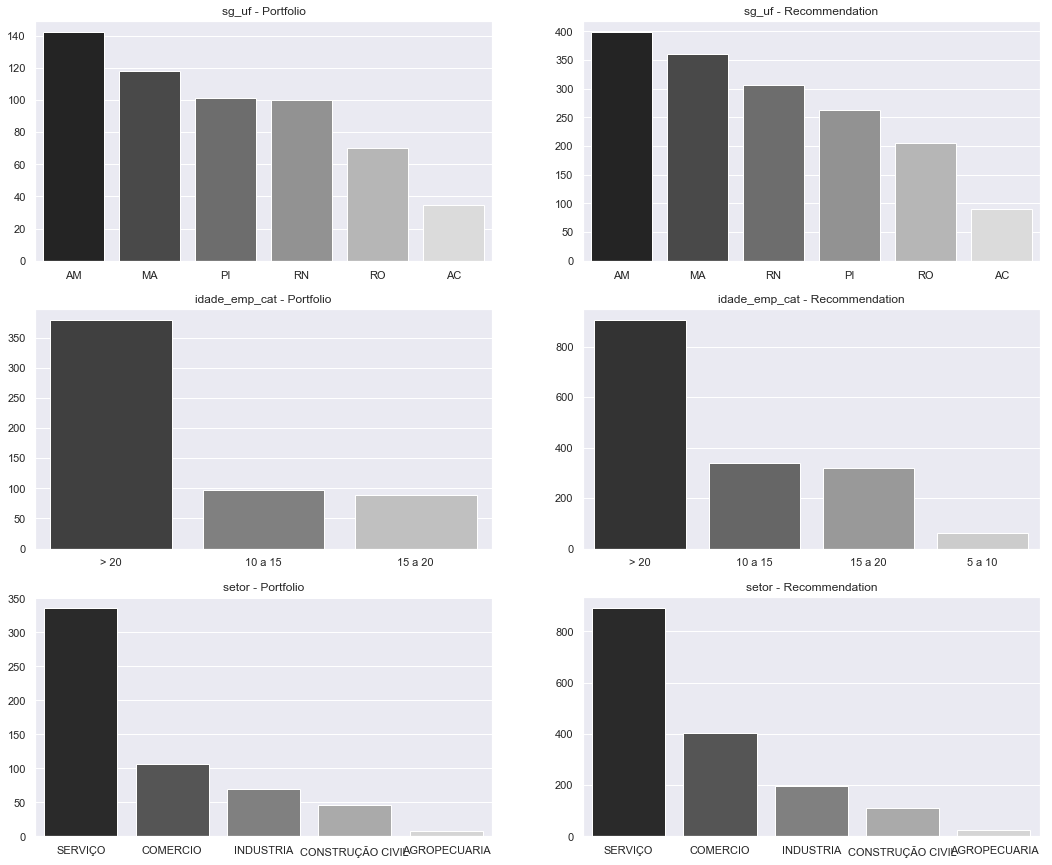

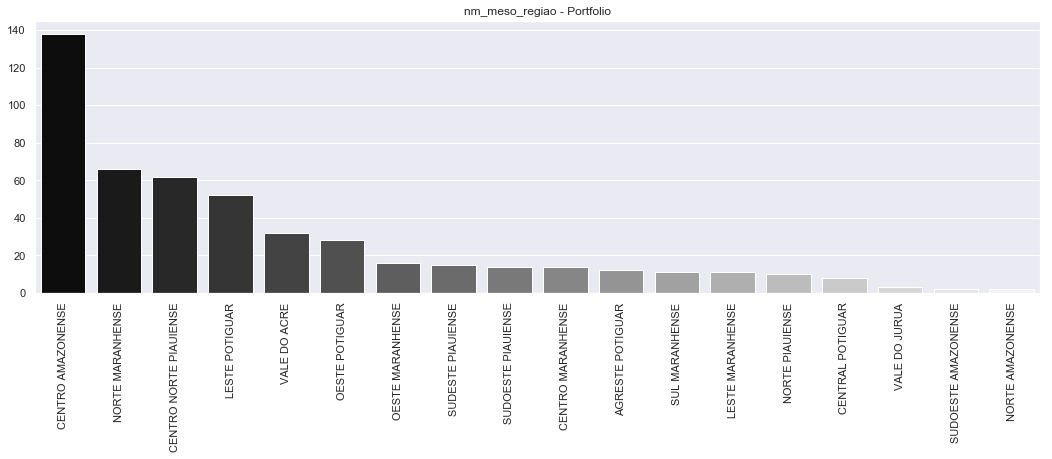

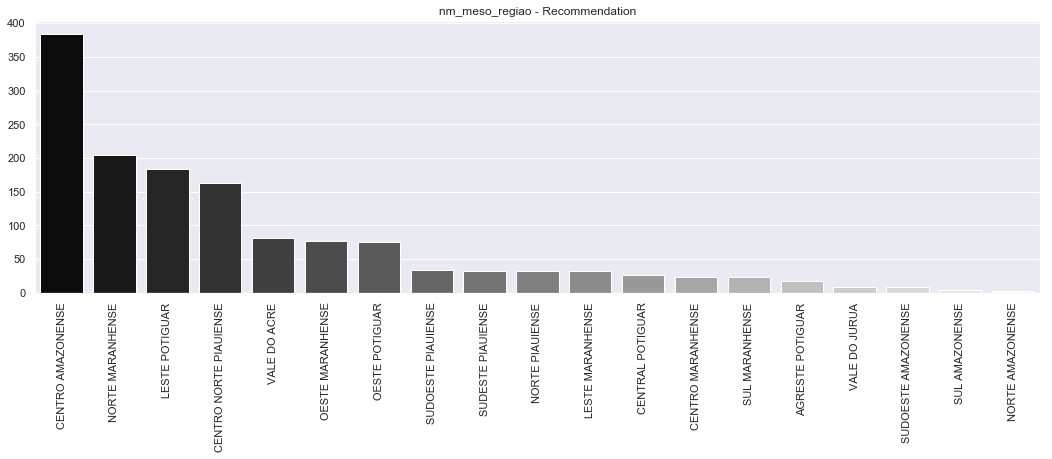

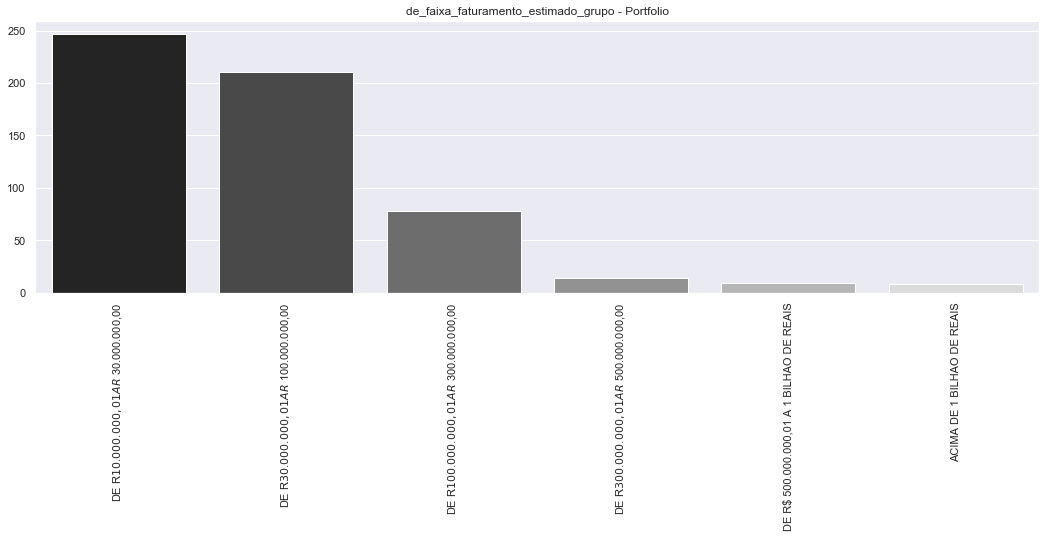

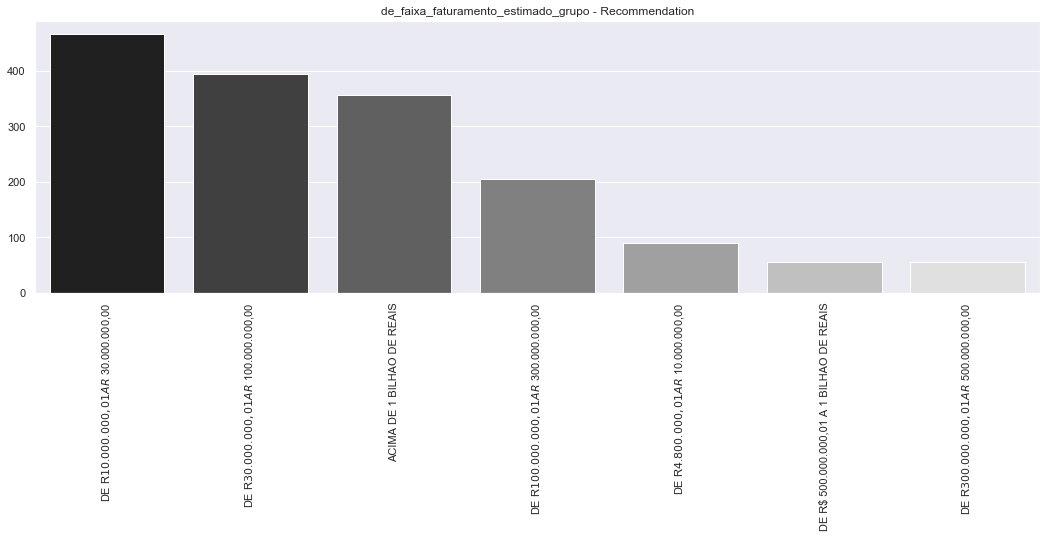

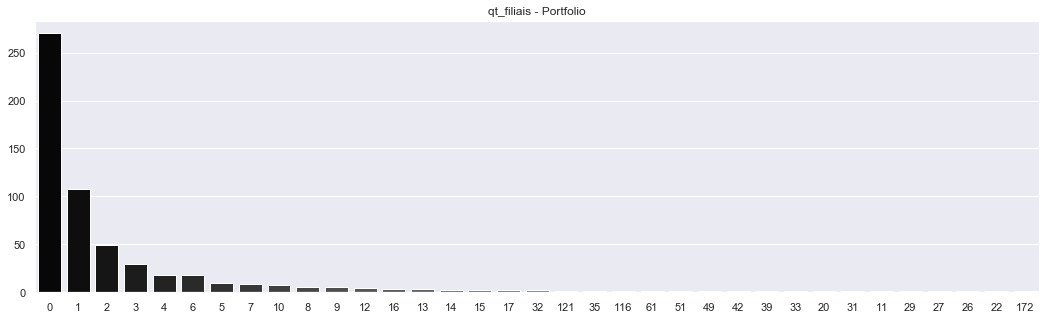

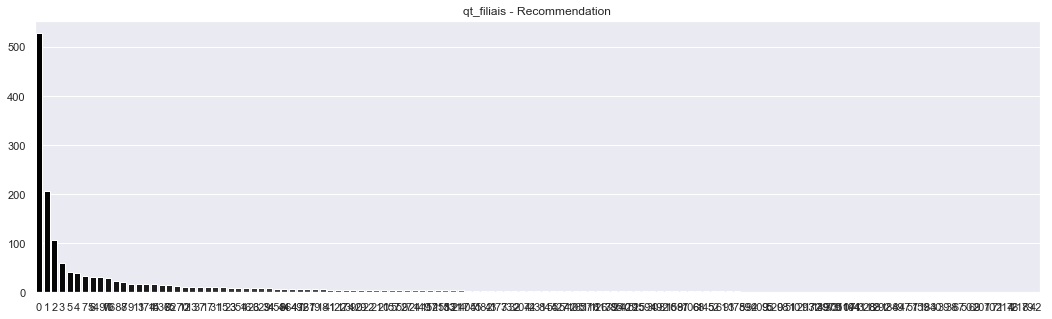

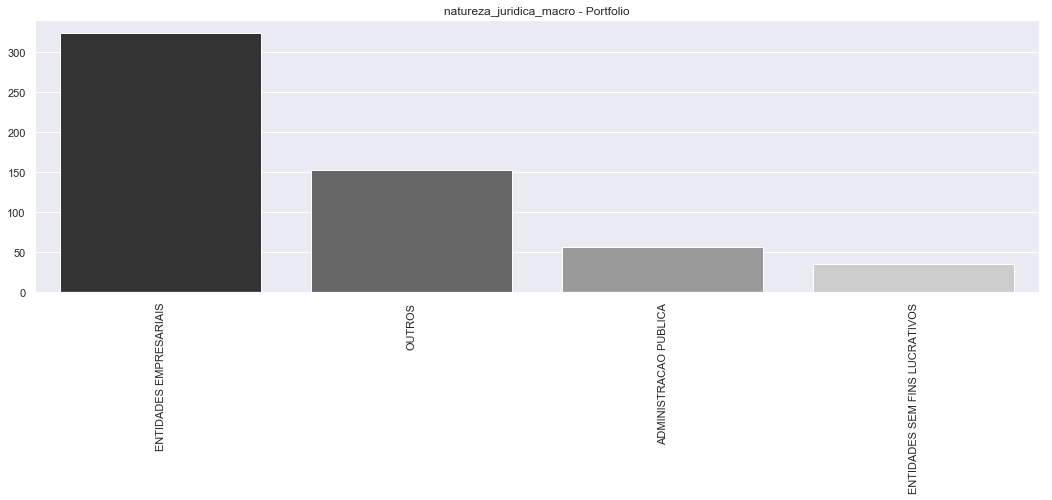

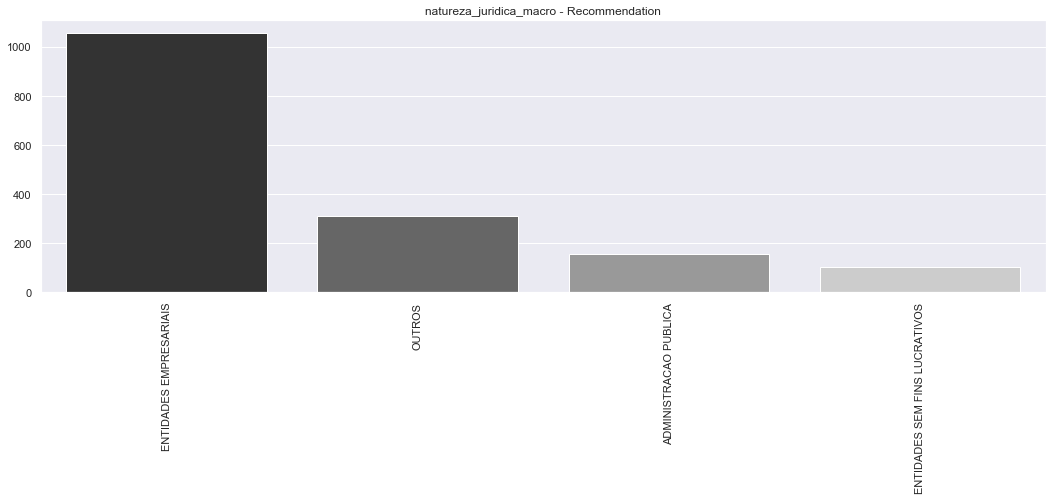

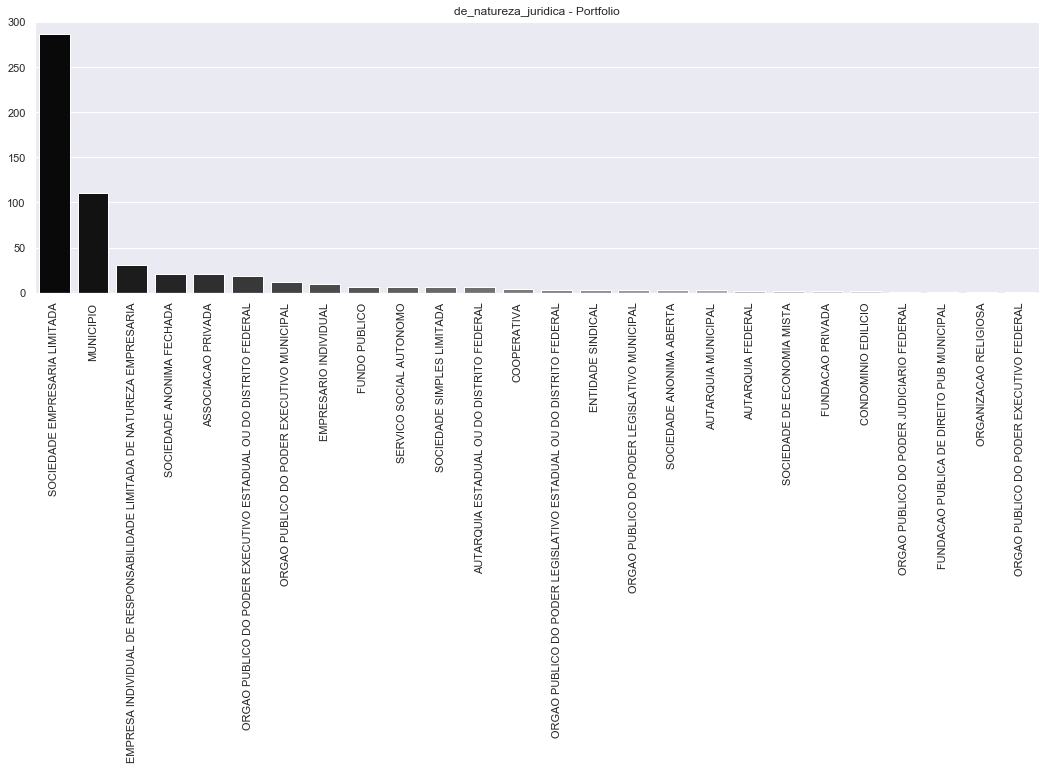

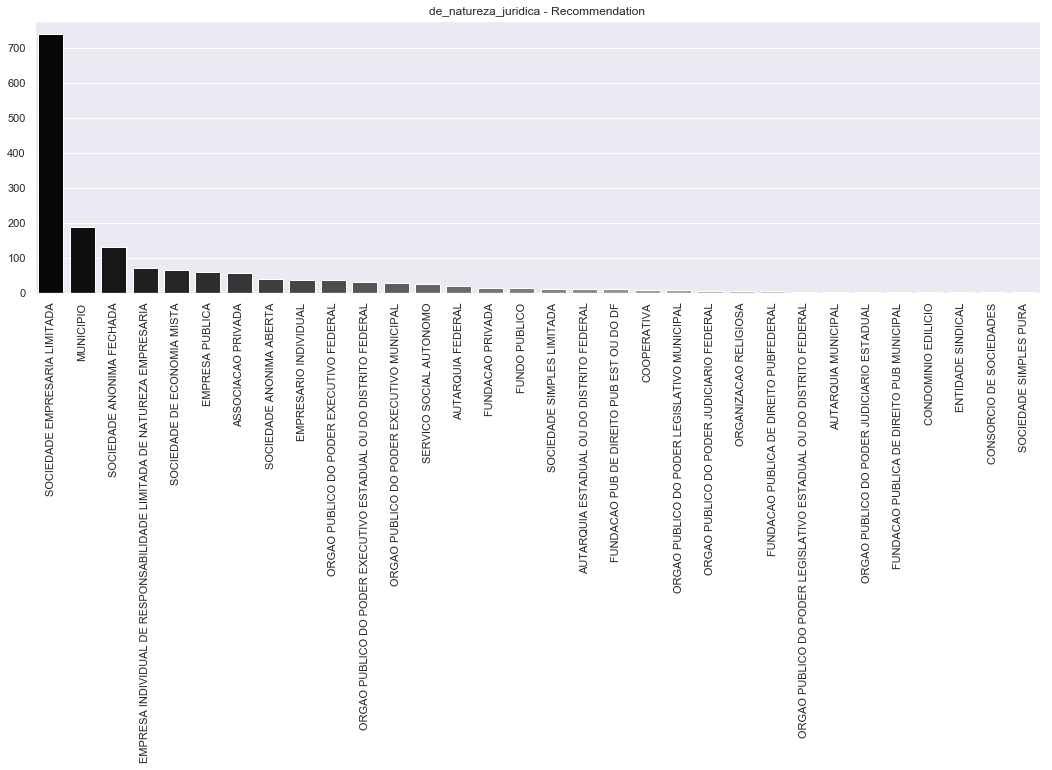

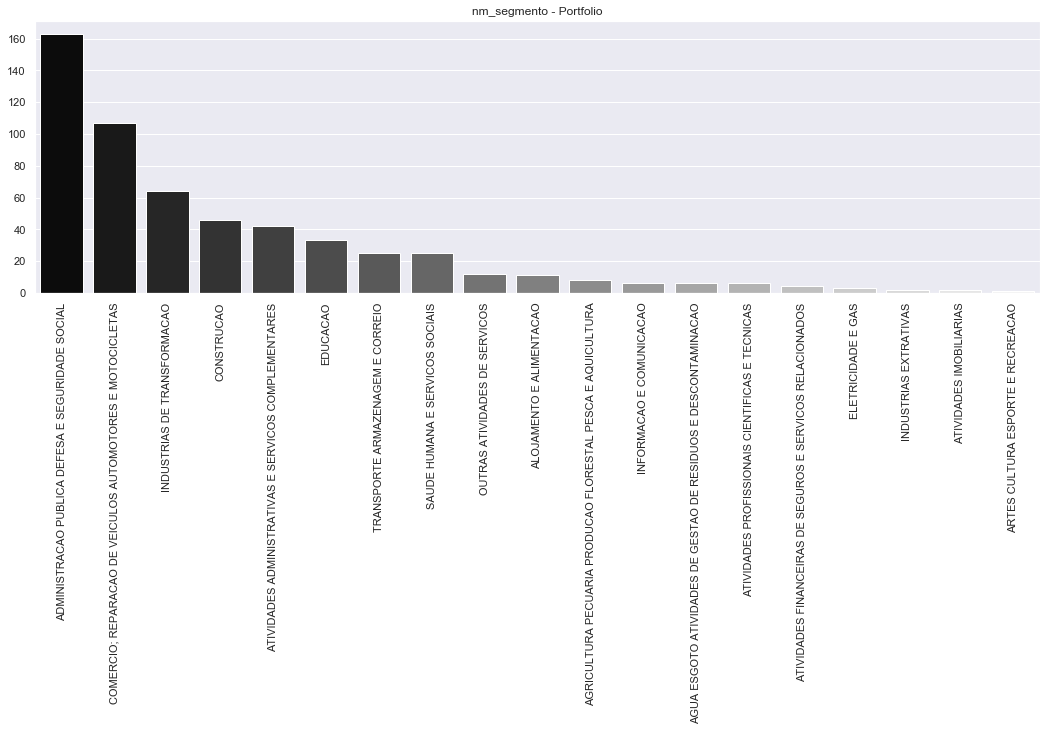

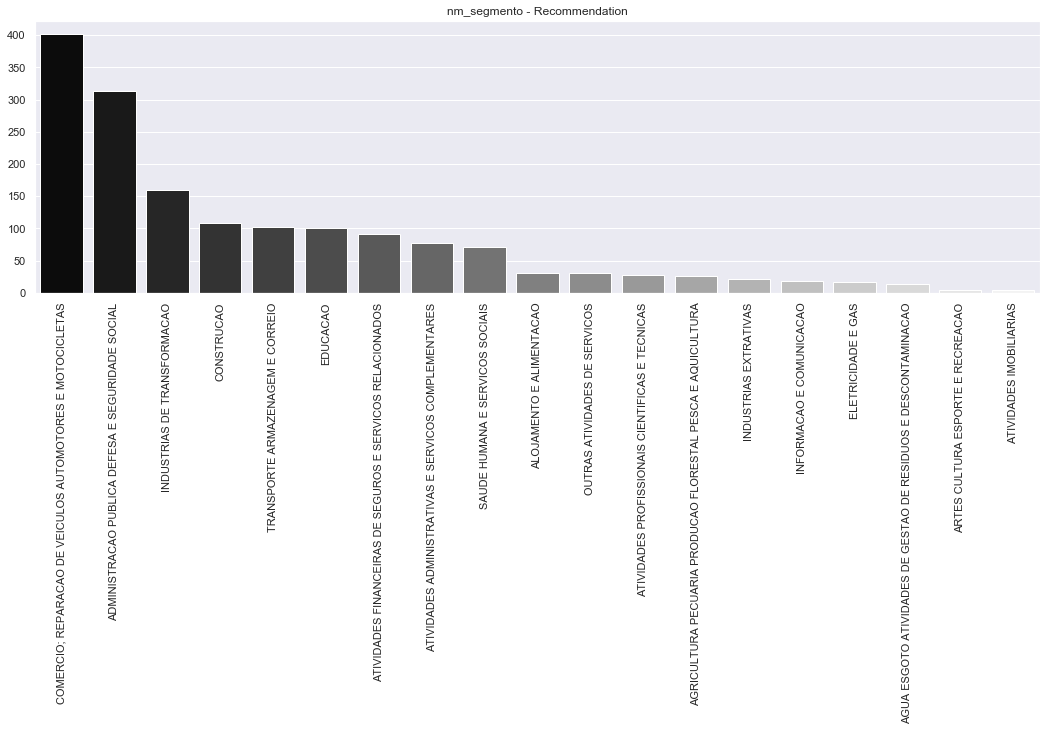

In [79]:
sns.set()
f, axes= plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(data=portfolio_T1, x="sg_uf", palette = 'gist_gray', order = portfolio_T1['sg_uf'].value_counts().index, ax=axes[0,0]);
axes[0,0].set_title("sg_uf - Portfolio")
axes[0,0].set_ylabel("")
axes[0,0].set_xlabel("")

sns.countplot(data=recommendation_full, x="sg_uf", palette = 'gist_gray', order = recommendation_full['sg_uf'].value_counts().index, ax=axes[0,1]);
axes[0,1].set_title("sg_uf - Recommendation")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.countplot(data=portfolio_T1, x="idade_emp_cat", palette = 'gist_gray', order = portfolio_T1['idade_emp_cat'].value_counts().index, ax=axes[1,0]);
axes[1,0].set_title("idade_emp_cat - Portfolio")
plt.xticks(rotation=90)
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.countplot(data=recommendation_full, x="idade_emp_cat", palette = 'gist_gray', order = recommendation_full['idade_emp_cat'].value_counts().index, ax=axes[1,1]);
axes[1,1].set_title("idade_emp_cat - Recommendation")
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("")


sns.countplot(data=portfolio_T1, x="setor", palette = 'gist_gray', order = portfolio_T1['setor'].value_counts().index, ax=axes[2,0]);
axes[2,0].set_title("setor - Portfolio")

axes[2,0].set_ylabel("")
axes[2,0].set_xlabel("")

sns.countplot(data=recommendation_full, x="setor", palette = 'gist_gray', order = recommendation_full['setor'].value_counts().index, ax=axes[2,1]);
axes[2,1].set_title("setor - Recommendation")
plt.xticks(rotation=0)
axes[2,1].set_ylabel("")
axes[2,1].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="nm_meso_regiao", palette = 'gist_gray', order = portfolio_T1['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao - Portfolio")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="nm_meso_regiao", palette = 'gist_gray', order = recommendation_full['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao - Recommendation")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = portfolio_T1['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = recommendation_full['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="qt_filiais", palette = 'gist_gray', order = portfolio_T1['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="qt_filiais", palette = 'gist_gray', order = recommendation_full['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="natureza_juridica_macro", palette = 'gist_gray', order = portfolio_T1['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="natureza_juridica_macro", palette = 'gist_gray', order = recommendation_full['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="de_natureza_juridica", palette = 'gist_gray', order = portfolio_T1['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="de_natureza_juridica", palette = 'gist_gray', order = recommendation_full['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="nm_segmento", palette = 'gist_gray', order = portfolio_T1['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="nm_segmento", palette = 'gist_gray', order = recommendation_full['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()


### Verify similar features values:

In [80]:
# Verify similarity between recommendation full values and portfolio values
similar_features_rf = pd.DataFrame()
similar_features_rf['idade_empresa_anos'] = recommendation_full['idade_empresa_anos'].between(portfolio_T1['idade_empresa_anos'].min(), portfolio_T1['idade_empresa_anos'].max(), inclusive=True).value_counts()
similar_features_rf['idade_emp_cat'] = recommendation_full['idade_emp_cat'].isin((portfolio_T1['idade_emp_cat'].unique())).value_counts()
similar_features_rf['de_natureza_juridica'] = recommendation_full['de_natureza_juridica'].isin((portfolio_T1['de_natureza_juridica'].unique())).value_counts()
similar_features_rf['sg_uf'] = recommendation_full['sg_uf'].isin((portfolio_T1['sg_uf'].unique())).value_counts()
similar_features_rf['natureza_juridica_macro'] = recommendation_full['natureza_juridica_macro'].isin((portfolio_T1['natureza_juridica_macro'].unique())).value_counts()
similar_features_rf['de_ramo'] = recommendation_full['de_ramo'].isin((portfolio_T1['de_ramo'].unique())).value_counts()
similar_features_rf['fl_rm'] = recommendation_full['fl_rm'].isin((portfolio_T1['fl_rm'].unique())).value_counts()
similar_features_rf['fl_matriz'] = recommendation_full['fl_matriz'].isin((portfolio_T1['fl_matriz'].unique())).value_counts()
similar_features_rf['fl_me'] = recommendation_full['fl_me'].isin((portfolio_T1['fl_me'].unique())).value_counts()
similar_features_rf['fl_sa'] = recommendation_full['fl_sa'].isin((portfolio_T1['fl_sa'].unique())).value_counts()
similar_features_rf['fl_epp'] = recommendation_full['fl_epp'].isin((portfolio_T1['fl_epp'].unique())).value_counts()
similar_features_rf['fl_mei'] = recommendation_full['fl_mei'].isin((portfolio_T1['fl_mei'].unique())).value_counts()
similar_features_rf['fl_ltda'] = recommendation_full['fl_ltda'].isin((portfolio_T1['fl_ltda'].unique())).value_counts()
similar_features_rf['fl_st_especial'] = recommendation_full['fl_st_especial'].isin((portfolio_T1['fl_st_especial'].unique())).value_counts()
similar_features_rf['fl_email'] = recommendation_full['fl_mei'].isin((portfolio_T1['fl_email'].unique())).value_counts()
similar_features_rf['fl_telefone'] = recommendation_full['fl_telefone'].isin((portfolio_T1['fl_telefone'].unique())).value_counts()
similar_features_rf['nm_segmento'] = recommendation_full['nm_segmento'].isin((portfolio_T1['nm_segmento'].unique())).value_counts()
similar_features_rf['nm_meso_regiao'] = recommendation_full['nm_meso_regiao'].isin((portfolio_T1['nm_meso_regiao'].unique())).value_counts()
similar_features_rf['de_faixa_faturamento_estimado_grupo'] = recommendation_full['de_faixa_faturamento_estimado_grupo'].isin((portfolio_T1['de_faixa_faturamento_estimado_grupo'].unique())).value_counts()
similar_features_rf['qt_filiais'] = recommendation_full['qt_filiais'].between(portfolio_T1['qt_filiais'].min(), portfolio_T1['qt_filiais'].max(), inclusive=True).value_counts()
similar_features_rf = similar_features_rf.fillna('0')
similar_features_rf

,idade_empresa_anos,idade_emp_cat,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,fl_rm,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,nm_segmento,nm_meso_regiao,de_faixa_faturamento_estimado_grupo,qt_filiais
True,1563,1563,1545,1624,1624,1616,1624,1035,1624,1624,1624,1624,1624,1624,1624,1624,1624,1620,1534,1402
False,61,61,79,0,0,8,0,589,0,0,0,0,0,0,0,0,0,4,90,222


In [81]:
# Verify similarity between recommendation top 25 values and portfolio values
similar_features_r_tp25 = pd.DataFrame()
similar_features_r_tp25['idade_empresa_anos'] = Top25_recommendations['idade_empresa_anos'].between(portfolio_T1['idade_empresa_anos'].min(), portfolio_T1['idade_empresa_anos'].max(), inclusive=True).value_counts()
similar_features_r_tp25['idade_emp_cat'] = Top25_recommendations['idade_emp_cat'].isin((portfolio_T1['idade_emp_cat'].unique())).value_counts()
similar_features_r_tp25['de_natureza_juridica'] = Top25_recommendations['de_natureza_juridica'].isin((portfolio_T1['de_natureza_juridica'].unique())).value_counts()
similar_features_r_tp25['sg_uf'] = Top25_recommendations['sg_uf'].isin((portfolio_T1['sg_uf'].unique())).value_counts()
similar_features_r_tp25['natureza_juridica_macro'] = Top25_recommendations['natureza_juridica_macro'].isin((portfolio_T1['natureza_juridica_macro'].unique())).value_counts()
similar_features_r_tp25['de_ramo'] = Top25_recommendations['de_ramo'].isin((portfolio_T1['de_ramo'].unique())).value_counts()
similar_features_r_tp25['fl_rm'] = Top25_recommendations['fl_rm'].isin((portfolio_T1['fl_rm'].unique())).value_counts()
similar_features_r_tp25['fl_matriz'] = Top25_recommendations['fl_matriz'].isin((portfolio_T1['fl_matriz'].unique())).value_counts()
similar_features_r_tp25['fl_me'] = Top25_recommendations['fl_me'].isin((portfolio_T1['fl_me'].unique())).value_counts()
similar_features_r_tp25['fl_sa'] = Top25_recommendations['fl_sa'].isin((portfolio_T1['fl_sa'].unique())).value_counts()
similar_features_r_tp25['fl_epp'] = Top25_recommendations['fl_epp'].isin((portfolio_T1['fl_epp'].unique())).value_counts()
similar_features_r_tp25['fl_mei'] = Top25_recommendations['fl_mei'].isin((portfolio_T1['fl_mei'].unique())).value_counts()
similar_features_r_tp25['fl_ltda'] = Top25_recommendations['fl_ltda'].isin((portfolio_T1['fl_ltda'].unique())).value_counts()
similar_features_r_tp25['fl_st_especial'] = Top25_recommendations['fl_st_especial'].isin((portfolio_T1['fl_st_especial'].unique())).value_counts()
similar_features_r_tp25['fl_email'] = Top25_recommendations['fl_mei'].isin((portfolio_T1['fl_email'].unique())).value_counts()
similar_features_r_tp25['fl_telefone'] = Top25_recommendations['fl_telefone'].isin((portfolio_T1['fl_telefone'].unique())).value_counts()
similar_features_r_tp25['nm_segmento'] = Top25_recommendations['nm_segmento'].isin((portfolio_T1['nm_segmento'].unique())).value_counts()
similar_features_r_tp25['nm_meso_regiao'] = Top25_recommendations['nm_meso_regiao'].isin((portfolio_T1['nm_meso_regiao'].unique())).value_counts()
similar_features_r_tp25['de_faixa_faturamento_estimado_grupo'] = Top25_recommendations['de_faixa_faturamento_estimado_grupo'].isin((portfolio_T1['de_faixa_faturamento_estimado_grupo'].unique())).value_counts()
similar_features_r_tp25['qt_filiais'] = Top25_recommendations['qt_filiais'].between(portfolio_T1['qt_filiais'].min(), portfolio_T1['qt_filiais'].max(), inclusive=True).value_counts()
similar_features_r_tp25 = similar_features_r_tp25.fillna('0')
similar_features_r_tp25

,idade_empresa_anos,idade_emp_cat,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,fl_rm,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,nm_segmento,nm_meso_regiao,de_faixa_faturamento_estimado_grupo,qt_filiais
True,21,21,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
False,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***
> ***
***
## Extras: 

### Recomendation filtered by portfolio values:

In [82]:
recommendation_full_filtered = pd.DataFrame()
recommendation_full_filtered = recommendation_full[recommendation_full['de_natureza_juridica'].isin(portfolio_T1['de_natureza_juridica'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['sg_uf'].isin(portfolio_T1['sg_uf'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['natureza_juridica_macro'].isin(portfolio_T1['natureza_juridica_macro'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['de_ramo'].isin(portfolio_T1['de_ramo'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['idade_emp_cat'].isin(portfolio_T1['idade_emp_cat'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_rm'].isin(portfolio_T1['fl_rm'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_matriz'].isin(portfolio_T1['fl_matriz'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_me'].isin(portfolio_T1['fl_me'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_sa'].isin(portfolio_T1['fl_sa'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_epp'].isin(portfolio_T1['fl_epp'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_mei'].isin(portfolio_T1['fl_mei'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_ltda'].isin(portfolio_T1['fl_ltda'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_st_especial'].isin(portfolio_T1['fl_st_especial'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_email'].isin(portfolio_T1['fl_email'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_telefone'].isin(portfolio_T1['fl_telefone'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['qt_filiais'].between(portfolio_T1['qt_filiais'].min(), portfolio_T1['qt_filiais'].max(), inclusive=True) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['idade_empresa_anos'].between(portfolio_T1['idade_empresa_anos'].min(), portfolio_T1['idade_empresa_anos'].max(), inclusive=True) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['nm_segmento'].isin(portfolio_T1['nm_segmento'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['nm_meso_regiao'].isin(portfolio_T1['nm_meso_regiao'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['de_faixa_faturamento_estimado_grupo'].isin(portfolio_T1['de_faixa_faturamento_estimado'].unique()) == True]
recommendation_full_filtered.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,...,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num,cliente,pred_1,pred_2,pred_3,predict_sum,dist_centroid,dist_centroid_norm
0,ae9b585cce5c12d83b86df9d4ab3caef3726cb105185ca484bdbd34e580a6b9d,True,SOCIEDADE EMPRESARIA LIMITADA,AM,ENTIDADES EMPRESARIAIS,ELETROELETRONICOS,INDUSTRIA,29.810959,> 20,False,False,False,False,False,2005-11-03,False,True,True,SIM,FABRICACAO 

***
### Companies with tax, legal, financial or operational issues:

In [83]:
# features to check:
dictionary.loc[dictionary['Coluna'].isin(['fl_st_especial', 'fl_simples_irregular', 'de_saude_tributaria', 'de_nivel_atividade', 'qt_socios_st_suspensa', 'qt_coligados', 'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa'])]

,Coluna,Tipo,Descrição
14,fl_st_especial,boolean value,true if dt_situacao_especial is not null. If it is not null means that some extraordinary situation is identified by the IRS (*ESPOLIO DE EMPRESARIO EMPRESA INDIVIDUAL OU EIRELI | *FALIDO | *EM LIQUIDACAO | *LIQUIDACAO JUDICIAL | *LIQUIDACAO EXTRA JUDICIAL | *REGISTRO NA JUNTA COMERCIAL EM ANDAMENTO | *EM LIQUID EXTRA JUDICIAL | *RECUPERACAO JUDICIAL | *INTERVENCAO*)
36,de_saude_tributaria,character,indicator of health tax status | Green if all tax are OK | Red if none are OK
39,de_nivel_atividade,character,probability of being operating | ALTA high probality | BAIXA | low probality.
41,fl_simples_irregular,boolean,true if the company is taxed under the SIMPLES regime and has a impeditive CNAE (economic activities that are not allowed to be taxed according to the simples regime) revenue above the limit of the regime.
54,qt_socios_st_suspensa,integer value,quantity of partners with suspended situation under IRS - Receit Federal
70,qt_coligados,integer value,quantity of connected companies
74,qt_coligados_baixada,integer value,quantity of connected companies that are considered as closed according to the IRS
75,qt_coligados_inapta,integer value,quantity of connected companies that are considered as inapt/unfit according to the IRS
76,qt_coligados_suspensa,integer value,quantity of connected companies that are considered suspended according to the IRS


> ### Companies with issues in Portfolio

In [84]:
# fl_st_especial
portfolio_T1['fl_st_especial'].value_counts()

False    564
True     2  
Name: fl_st_especial, dtype: int64

In [85]:
# fl_simples_irregular
portfolio_T1['fl_simples_irregular'].value_counts()

False    565
True     1  
Name: fl_simples_irregular, dtype: int64

In [86]:
# de_saude_tributaria
portfolio_T1['de_saude_tributaria'].value_counts()

VERDE       376
AZUL        134
LARANJA     44 
VERMELHO    11 
AMARELO     1  
Name: de_saude_tributaria, dtype: int64

In [87]:
# de_nivel_atividade
portfolio_T1['de_nivel_atividade'].value_counts()

ALTA     523
MEDIA    37 
BAIXA    6  
Name: de_nivel_atividade, dtype: int64

In [88]:
# Dataset Portfolio issues: 
portfolio_not_issues = pd.DataFrame()
portfolio_not_issues = portfolio_T1[portfolio_T1['fl_st_especial'] != True]
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['fl_simples_irregular'] != True]
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['de_saude_tributaria'] != 'VERMELHO']
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['de_nivel_atividade'] != 'BAIXA']
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['de_nivel_atividade'] != 'MUITO BAIXA']
portfolio_issues = pd.DataFrame(portfolio_T1['id'])
portfolio_issues['Tr_exc'] = portfolio_issues['id'].isin(portfolio_not_issues['id'])
portfolio_issues = portfolio_issues[portfolio_issues['Tr_exc'] != True]
portfolio_issues = portfolio_issues.drop(['Tr_exc'], axis = 1)
portfolio_issues = pd.merge(portfolio_issues, market_T1, on='id', how='left')
portfolio_issues.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,f081e5c6355d6ae432cb62330fc4108a39616f1bf3d2623011b8b647a3620cec,True,SOCIEDADE ANONIMA FECHADA,RN,ENTIDADES EMPRESARIAIS,SERVICOS DE SAUDE,SERVIÇO,21.832877,> 20,False,True,False,False

In [89]:
portfolio_issues.shape

(20, 182)

> ### Companies with issues in Recomendation_full

In [90]:
# fl_st_especial
recommendation_full['fl_st_especial'].value_counts()

False    1623
True     1   
Name: fl_st_especial, dtype: int64

In [91]:
# fl_simples_irregular
recommendation_full['fl_simples_irregular'].value_counts()

False    1620
True     4   
Name: fl_simples_irregular, dtype: int64

In [92]:
# de_saude_tributaria
recommendation_full['de_saude_tributaria'].value_counts()

VERDE       1099
AZUL        304 
LARANJA     77  
VERMELHO    76  
AMARELO     68  
Name: de_saude_tributaria, dtype: int64

In [93]:
# de_nivel_atividade
recommendation_full['de_nivel_atividade'].value_counts()

ALTA     1507
MEDIA    102 
BAIXA    15  
Name: de_nivel_atividade, dtype: int64

In [94]:
# Dataset recommendation_full issues: 
recommendation_full_not_issues = pd.DataFrame()
recommendation_full_not_issues = recommendation_full[recommendation_full['fl_st_especial'] != True]
recommendation_full_not_issues = recommendation_full_not_issues[recommendation_full_not_issues['fl_simples_irregular'] != True]
recommendation_full_not_issues = recommendation_full_not_issues[recommendation_full_not_issues['de_saude_tributaria'] != 'VERMELHO']
recommendation_full_not_issues = recommendation_full_not_issues[recommendation_full_not_issues['de_nivel_atividade'] != 'BAIXA']
recommendation_full_not_issues = recommendation_full_not_issues[recommendation_full_not_issues['de_nivel_atividade'] != 'MUITO BAIXA']
recommendation_full_issues = pd.DataFrame(recommendation_full['id'])
recommendation_full_issues['Tr_exc'] = recommendation_full_issues['id'].isin(recommendation_full_not_issues['id'])
recommendation_full_issues = recommendation_full_issues[recommendation_full_issues['Tr_exc'] != True]
recommendation_full_issues = recommendation_full_issues.drop(['Tr_exc'], axis = 1)
recommendation_full_issues = pd.merge(recommendation_full_issues, market_T1, on='id', how='left')
recommendation_full_issues.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,f1a4f6ac9c8daf40b096c801d6f8dec436cf81a7d8b88817b421593124d3c4c0,True,SOCIEDADE EMPRESARIA LIMITADA,AM,ENTIDADES EMPRESARIAIS,INDUSTRIA AUTOMOTIVA,INDUSTRIA,45.084932,> 20,False,False,F

In [95]:
recommendation_full_issues.shape

(92, 182)

***

***
> ***
***

***